In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dataGen as dg
from jupyterthemes import jtplot
import jupyterthemes as jt
jt.install_theme("onedork")
jtplot.reset()

ModuleNotFoundError: No module named 'dataGen'

## Review of the derivation of the unwrapper phase

The idea behind the derivation of the unwrapper phase is to use the stationary phase approximation to evaluate the Fourier transform of an amplitude distribution with some arbitrary phase mask, and then work backwards from a particular coordinate transformation to discover the corresponding phase mask. That is, if our incident wave is given by an intensity distribution $g(r,\theta)$ in real space, then we add a phase $\phi(r,\theta)$ to it, send it through a lens, and then the wave will be given in the back Fourier plane of the lens by:
\begin{split}
\tilde{g}(u,v) &= C_E \int g(r,\theta) e^{i\left(\frac{k}{f}(ur\cos{\theta} + vr\sin{\theta}) + \phi(r,\theta)\right)} r dr d\theta
\\
&= C_E \int g(r,\theta) e^{ikh(r,\theta)} r dr d\theta
\end{split}
for some normalization constant $C_E$, and where we have defined 
$$h(r,\theta) = \frac{1}{f}(ur\cos{\theta}+vr\sin{\theta}) + \frac{1}{k}\phi(r,\theta)$$

Then, the stationary phase approximation essentially says that if $g(r,\theta)$ is an amplitude-only function and contains no phase information and $k$ is large, then any change in $h(r,\theta)$ causes rapid oscillations of phase, which cancel each other, and so the only points $(r,\theta)$ that contribute to $\tilde{g}(u,v)$ are the points at which $h(r,\theta)$ is constant. This gives us the conditions:
\begin{split}
\frac{1}{r}\partial_r h(r,\theta) &= 0 \longrightarrow \partial_r \phi(r,\theta) &= \frac{k}{f}\left(u\cos{\theta}+v\sin{\theta}\right)
\\
\partial_{\theta} h(r,\theta) &= 0 \longrightarrow \partial_{\theta} \phi(r,\theta) &= \frac{k}{f}\left(vr\cos{\theta} - ur\sin{\theta}\right)
\end{split}

Then we substitute the coordinate transformation we'd like, in our case $u = -a \ln{\frac{r}{b}}$, $v=a\theta$, and we get the conditions:
\begin{split}
\partial_r \phi(r,\theta) &= \frac{k}{f}\left(-a \ln{\frac{r}{b}}\cos{\theta}+a\theta\sin{\theta}\right)
\\
\partial_{\theta} \phi(r,\theta) &= \frac{k}{f}\left(a\theta r\cos{\theta} +a \ln{\frac{r}{b}}r\sin{\theta}\right)
\end{split}

These two are easily integrated to give:
$$\phi(r,\theta) = \frac{ka}{f}\left(r\theta\sin{\theta} - r\cos{\theta}\ln{\frac{r}{b}} + r\cos{\theta}\right)$$

Now we have a phase mask such that the only contribution to $\tilde{g}(u,v)$ at a given $(u,v)$ comes from $g(r(u,v),\theta(u,v))$. 


## Adjustment for waves with OAM

The problem with applying this to waves with OAM is that the function $g(r,\theta)$ describing the incident wave is no longer only an amplitude distribution; it also contains phase information, namely $\exp(il\theta)$. So, the points where $h(r,\theta)$ was stationary are no longer the points at which the phase of the integrand are stationary. However, if we assume that the stationary phase approximation is still valid (which I'm not positive we can), we can work out what coordinate transformation is actually being implemented by fixing $\phi(r,\theta)$ and solving for $u(r,\theta)$ and $v(r,\theta)$. This corresponds to just an extra term in the second condition:
\begin{split}
\frac{1}{r}\partial_r h(r,\theta) &= 0 
\\
\partial_{\theta} h(r,\theta) + \frac{l}{k} &= 0
\end{split}

Or, substituting for $\partial_r h(r,\theta)$, $\partial_{\theta} h(r,\theta)$:
\begin{split}
\frac{1}{f}\left(u\cos\theta + v\sin\theta\right) + \frac{a}{f}\left(\theta\sin\theta - \cos\theta\ln\frac{r}{b}\right) = 0
\\
\frac{1}{f}\left(-ur\sin\theta + vr\cos\theta\right) + \frac{a}{f}\left(r\theta\cos\theta + r\ln{\frac{r}{b}}\sin\theta\right) + \frac{l}{k} = 0
\end{split}

And simplifying:

\begin{split}
\left(u\cos\theta + v\sin\theta\right) + a\left(\theta\sin\theta - \cos\theta\ln\frac{r}{b}\right) = 0
\\
\left(-u\sin\theta + v\cos\theta\right) + a\left(\theta\cos\theta + \ln{\frac{r}{b}}\sin\theta\right) + \frac{lf}{kr} = 0
\end{split}

Now to solve this, assume that $u(r,\theta)$ and $v(r,\theta)$ take the same form as before but with some function added to each of them. Note this isn't an approximation, it's just a convenient description. So, we write:
\begin{split}
u(r,\theta) &= -a\ln\frac{r}{b} + \tilde{u}(r,\theta)
\\
v(r,\theta) &= a\theta + \tilde{v}(r,\theta)
\end{split}

Now you can either plug in these forms directly and see cancellation, or just note that the original forms of $u$ and $v$ solved these equations except for the factor of $\frac{lf}{kr}$ and immediately write down:
\begin{split}
\tilde{u}\cos\theta + \tilde{v}\sin\theta = 0
\\
-\tilde{u}\sin\theta + \tilde{v}\cos\theta + \frac{lf}{kr} = 0
\end{split}

These equations are now easy to solve and you find:
\begin{split}
\tilde{u} = \frac{lf}{k}\frac{sin\theta}{r}
\\
\tilde{v} = -\frac{lf}{k}\frac{\cos\theta}{r}
\end{split}

Or, in total:
\begin{split}
u(r,\theta) &= -a\ln\frac{r}{b} + \frac{lf}{k}\frac{sin\theta}{r}
\\
v(r,\theta) &= a\theta -\frac{lf}{k}\frac{\cos\theta}{r}
\end{split}

Lastly, we can rewrite these in terms of a distortion factor $\kappa = \frac{lf}{ka}$ as 
\begin{split}
u(r,\theta) &= -\ln\frac{r}{b} + \kappa\frac{sin\theta}{r}
\\
v(r,\theta) &= \theta -\kappa\frac{\cos\theta}{r}
\end{split}


Now, how do we interpret these forms? Do they make physical sense, and do they match simulations at all?

For interpretation, let's look at some visualizations of this coordinate transformation. Without the corrections, the coordinate transformation maps circles to vertical lines and radial lines to horizontal lines. Both plots show the contours where $r$ and $\theta$ are constant. In the first plot this is obvious. In the second plot, it's a bit less clear; it's also harder to map clear contours since $u$ is logarithmic. However, it helps to consider the bounds. $r=0$ gets mapped to $u=\infty$, $r/b=1$ gets mapped to $u=0$, and $r=\infty$ gets mapped to $u=-\infty$. For clearer visualization, I've only drawn contours for $u > 0$. 

In [2]:
a = 10/(2*np.pi); b = 3
k = 2*np.pi; f = .3; lam = 2*np.pi/k
l = 10

x = np.linspace(-10,10,1000); y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2); T = np.arctan2(Y,X)

dx = x[1]-x[0]; dy = y[1]-y[0]; xres=len(x); yres=len(y)
u = lam*f*np.linspace(-1/(2*dx),(xres-2)/(2*dx*xres),xres)
v = lam*f*np.linspace(-1/(2*dy),(yres-2)/(2*dy*yres),yres)
U,V = np.meshgrid(u,v)
rp = b*np.exp(-U/a); tp = V/a
rp[:,:500] = 0
jtplot.reset()
plt.figure(figsize=(14,7))
plt.subplot(1,2,1); plt.title("(r,theta)"); plt.contour(T); plt.contour(R,colors=['black'])
plt.subplot(1,2,2); plt.title("(u,v)"); plt.contour(tp); plt.contour(rp,colors=['black'])
plt.savefig("dummy1.png")

NameError: name 'jtplot' is not defined

Neat. Now, let's look at what that transformation is when we included the corrections due to angular phase. This is actually harder to do since I can't solve for $r(u,v), \theta(u,v)$ algebraically. All this really means, though, is that I can't use pyplot's contour function to make a contour plot of constant $r$, and I have to do it by hand. 

So, what's plotted below on the right are lines of constant $r$, in the $u$-$v$ plane, with $r$ varying between 1 and 10 from left to right. (Also, for all of these, $l = 10$.)

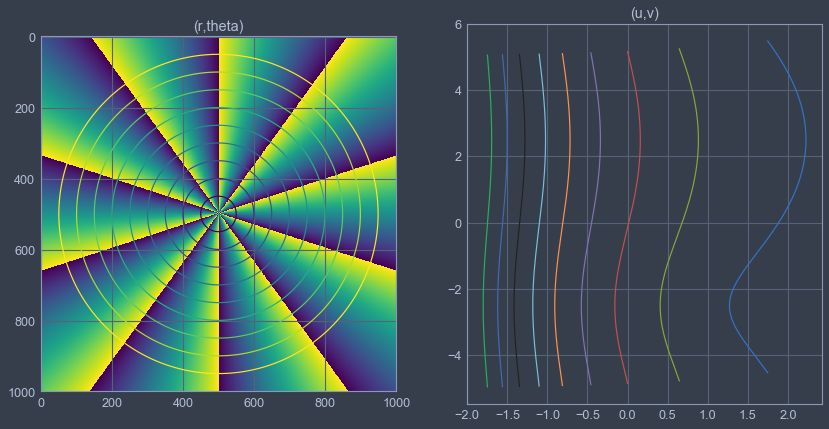

In [4]:
x = np.linspace(-10,10,1000); y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2); T = np.arctan2(Y,X)

LG = dg.LG(X,Y,l,w_0=2)
rlist = np.arange(1,10); t = np.linspace(-np.pi,np.pi,1000)
U = [-a*np.log(r/b)+l*f/k*np.sin(t)/r for r in rlist]
V = [a*t - l*f/k*np.cos(t)/r for r in rlist]

dx = x[1]-x[0]
extent = lam*f*np.array([-1/(2*dx),1/(2*dx),-1/(2*dx),1/(2*dx)])

plt.figure(figsize=(14,7))
plt.subplot(1,2,1); plt.title("(r,theta)"); plt.imshow(np.angle(LG))
plt.contour(np.sqrt(X**2+Y**2),levels=rlist)
plt.subplot(1,2,2); plt.title("(u,v)")
for i in range(len(U)):
    plt.plot(U[i],V[i])#; plt.imshow(np.abs(psi_L1)**2,extent=extent,origin='lower')
plt.savefig("test1.png")

So, qualitatively speaking, what happens is that what should be a line in the $u$-$v$ plane becomes sinusoidal, and also gets sinusoidally squeezed vertically. Now, we need to check that this matches simulations of waves propagating through the sorter. This is pretty easy to do; below, I've simulated an LG beam and numerically found the radius of its maximum intensity. Then, I simulated sending it through the first element and first lens of the sorter (the combined effect of which is to make the coordinate transform intensity-wise but not to correct for the phase), and plotted the resulting intensity distribution. Over that plot, I've plotted a curve in the $u$-$v$ plane according to the equations I derived, with $r$ fixed to be the radius of maximum intensity of the LG beam.

224


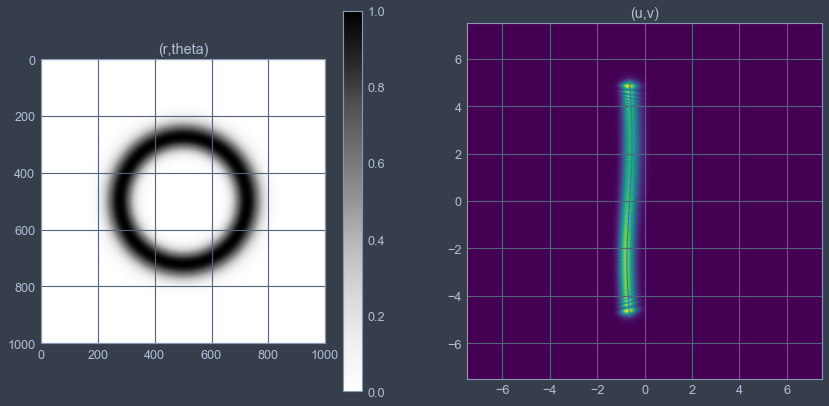

In [5]:
LG = dg.LG(X,Y,l,w_0=2)
phi1 = a*k/f*(Y*np.arctan2(Y,X)-X*np.log(np.sqrt(X**2+Y**2)/b)+X)
psi_u = LG*np.exp(1j*phi1)
psi_L1 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(psi_u)))


x = np.linspace(-10,10,1000); y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2); T = np.arctan2(Y,X)

r = 2*np.abs(500-np.argmax(LG[500]))/100; t = np.linspace(-np.pi,np.pi,1000)
U = -a*np.log(r/b)+l*f/k*np.sin(t)/r; V = a*t - l*f/k*np.cos(t)/r

dx = x[1]-x[0]
extent = lam*f*np.array([-1/(2*dx),1/(2*dx),-1/(2*dx),1/(2*dx)])

print(np.abs(500-np.argmax(LG[500])))
plt.figure(figsize=(14,7))
plt.subplot(1,2,1); plt.title("(r,theta)"); plt.imshow(np.abs(LG)**2,cmap='binary_r'); plt.colorbar()
plt.subplot(1,2,2); plt.title("(u,v)"); plt.plot(U,V); plt.imshow(np.abs(psi_L1)**2,extent=extent,origin='lower')
plt.show()

What's neat is that this is actually accurate for higher values of OAM. For example, let's try with $l=100$. To do so we have to change the waist of the beam in order to do the computation. But, we see that this coordinate transformation matches essentially perfectly. 

354


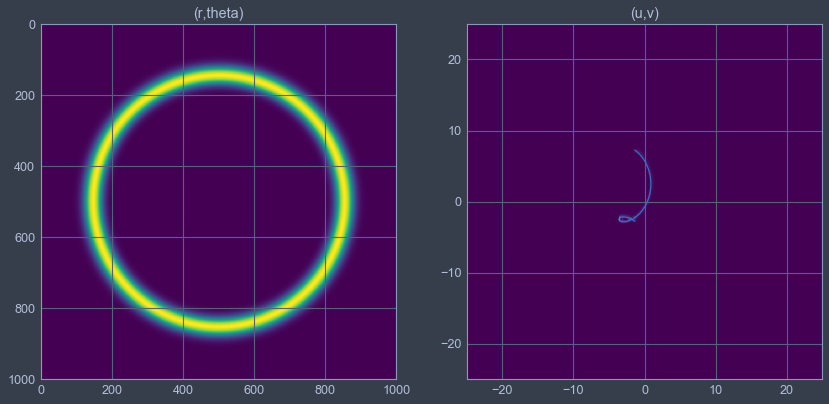

In [7]:
l=100
f=1
LG = dg.LG(X,Y,l,w_0=1)
phi1 = a*k/f*(Y*np.arctan2(Y,X)-X*np.log(np.sqrt(X**2+Y**2)/b)+X)
psi_u = LG*np.exp(1j*phi1)
psi_L1 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(psi_u)))


x = np.linspace(-10,10,1000); y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2); T = np.arctan2(Y,X)

r = 2*np.abs(500-np.argmax(LG[500]))/100; t = np.linspace(-np.pi,np.pi,1000)
U = -a*np.log(r/b)+l*f/k*np.sin(t)/r; V = a*t - l*f/k*np.cos(t)/r

dx = x[1]-x[0]
extent = lam*f*np.array([-1/(2*dx),1/(2*dx),-1/(2*dx),1/(2*dx)])

print(np.abs(500-np.argmax(LG[500])))
plt.figure(figsize=(14,7))
plt.subplot(1,2,1); plt.title("(r,theta)"); plt.imshow(np.abs(LG)**2)
plt.subplot(1,2,2); plt.title("(u,v)"); plt.plot(U,V); plt.imshow(np.abs(psi_L1)**2,extent=extent,origin='lower')
plt.show()

## Conclusions

So, this little bit of algebra shows exactly what coordinate transformation is being implemented when we send a beam with azimuthal phase dependence through these sorter elements. What remains is to figure out whether there's anything we can do to rectify the adverse effects of this altered coordinate transformation, in addition to determining whether there's even enough demand for high-OAM sorting to justify putting time into it. However, one problem that probably is worth solving is the fact that for this method of sorting, even low-OAM ($l<5$) gets a decent amount of error, due to this effect. 